In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as sts
import math
import statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline

In [3]:
def disp(xm, k):
    return (1. * xm / (k - 1))**2 * k / (k - 2)

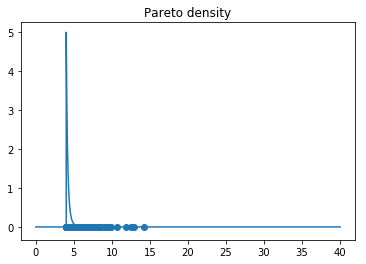

In [9]:
#График плотности распределения Парето
N = 100000
xm = 3
k = 5
pareto_rv = sts.pareto(k, xm)
x = np.linspace(0, 40, N)
pdf = pareto_rv.pdf(x) #плотность распределения
plt.plot(x, pdf)

pnt = np.empty((N)) #pnt нужен для того чтобы отметить точки с нулевой y-координатой
pnt = pareto_rv.rvs(N)
plt.scatter(sam, [0] * len(sam))
plt.title('Pareto density')
plt.show()

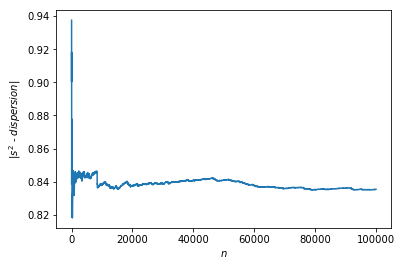

In [288]:
#График модуля разности выборочной дисперсии и ее теоретического значения
d = disp(xm, k)
X = pareto_rv.rvs(N)
s2 = np.empty((N))
delta = np.empty((N))
Xsum = 1. *np.cumsum(X) #необходимо для подсчета выборочной дисперсии
X2sum = 1. * np.cumsum(X**2) #необходимо для подсчета выборочной дисперсии
for n in range(1, N + 1):
    s2[n - 1] = X2sum[n - 1] * 1. / n - (1. * Xsum[n - 1] / n)**2 #выборочная дисперсия
    delta[n - 1] = abs(s2[n - 1] - d) #отличие выборочной дисперсии от ее теоретического значения

plt.plot(range(1, N + 1), delta)
plt.ylabel('|$s^2$ - $dispersion$|')
plt.xlabel('$n$')
plt.show()

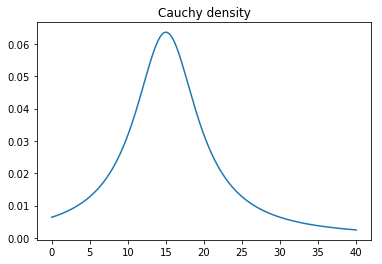

In [119]:
#График плотности распределения Коши
x0 = 15
gamma = 5
cauchy_rv = sts.cauchy(x0, gamma)
x = np.linspace(0, 40, N)
pdf = cauchy_rv.pdf(x) #плотность распределения
plt.plot(x, pdf)
plt.title('Cauchy density')
plt.show()

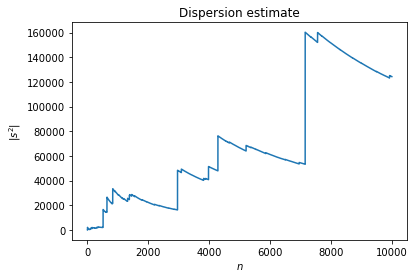

In [273]:
#График оценки дисперсии
X = cauchy_rv.rvs(N)
s2 = np.empty((N))
Xsum = 1. * np.cumsum(X) #необходимо для подсчета выборочной дисперсии
X2sum = 1. * np.cumsum(X**2) #необходимо для подсчета выборочной дисперсии
for n in range(1, N + 1):
    s2[n - 1] = X2sum[n - 1] * 1. / n - (1. * Xsum[n - 1] / n)**2 #выборочная дисперсия
plt.plot(range(1, N + 1), s2)
plt.ylabel('|$s^2$|')
plt.xlabel('$n$')
plt.title('Dispersion estimate')
plt.show()